<a href="https://colab.research.google.com/github/JaimeTorio/UFV_Visualizacion/blob/main/Ejercicios%20de%20clase/%20Clase2b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clase 18/10/2024**

In [25]:
import pandas as pd
df = pd.read_csv('datos_ejercicio_ventas.csv')
print(df.head())


         COUNTRY        SUBBRAND  YEAR  MONTH     SCENARIO FORECAST  \
0       Portugal     Lipton (L3)  2023     12  AI_forecast  AI_P02F   
1  Great Britain     Lipton (L3)  2023     12  AI_forecast  AI_P10F   
2          Spain  Pepsi Max (L3)  2023     12  AI_forecast  AI_P09F   
3  Great Britain        7up (L3)  2024     12  AI_forecast  AI_P10F   
4        Hungary     Lipton (L3)  2023      9  AI_forecast  AI_P03F   

   FORECAST_YEAR         AMOUNT  
0         2023.0  754356.237194  
1         2023.0  560030.558029  
2         2023.0   88501.980847  
3         2023.0  363224.511516  
4         2023.0  396176.120491  


In [26]:
# 1. Tamaño del Dataset
dataset_size = df.shape
print(f'Tamaño del dataset: {dataset_size}')

Tamaño del dataset: (18666, 8)


In [27]:
# 2. Número de Actuals y Forecast
actuals_forecast_count = df['SCENARIO'].value_counts()
print(f'Número de Actuals y Forecast: \n{actuals_forecast_count}')

Número de Actuals y Forecast: 
SCENARIO
AI_forecast    17766
actual           900
Name: count, dtype: int64


In [28]:
# Crear una columna de fecha predicha usando solo el año de predicción
df['PREDICTED_DATE'] = df['FORECAST_YEAR']

# Crear una columna de fecha actual combinando año y mes
df['ACTUAL_DATE'] = df['YEAR'] + (df['MONTH'] - 1) / 12

# Calcular la diferencia (HORIZON) entre la fecha predicha y la fecha actual
df['HORIZON'] = df['ACTUAL_DATE'] - df['PREDICTED_DATE']

# Convertir el horizonte a meses
df['HORIZON_MONTHS'] = df['HORIZON'] * 12

# Filtrar solo los registros con predicciones (AI_forecast)
horizonte_forecast = df[df['SCENARIO'] == 'AI_forecast'][['COUNTRY', 'SUBBRAND', 'YEAR', 'MONTH', 'HORIZON_MONTHS']]

# Mostrar los resultados de los horizontes en meses
horizonte_forecast.head()


,COUNTRY,SUBBRAND,YEAR,MONTH,HORIZON_MONTHS
0,Portugal,Lipton (L3),2023,12,11.0
1,Great Britain,Lipton (L3),2023,12,11.0
2,Spain,Pepsi Max (L3),2023,12,11.0
3,Great Britain,7up (L3),2024,12,23.0
4,Hungary,Lipton (L3),2023,9,8.0


In [29]:
# 4. Número de países y productos
num_countries = df['COUNTRY'].nunique()
num_products = df['SUBBRAND'].nunique()
print(f'Número de países: {num_countries}')
print(f'Número de productos: {num_products}')

Número de países: 9
Número de productos: 6


In [30]:
# 5. Histórico de datos (Actuals y Forecast)
historical_data_range = df[['YEAR', 'MONTH']].drop_duplicates().sort_values(by=['YEAR', 'MONTH'])
print('Histórico de datos:')
print(historical_data_range.head())

Histórico de datos:
     YEAR  MONTH
34   2023      1
397  2023      2
118  2023      3
9    2023      4
57   2023      5


In [31]:
# 6. Forecasts distintos
distinct_forecasts = df['FORECAST'].nunique()
print(f'Forecasts distintos: {distinct_forecasts}')

Forecasts distintos: 12


1. **Tamaño del Dataset**: 18,666 filas y 8 columnas.
2. **Número de Actuals y Forecast**:
   - AI_forecast: 17,766 registros.
   - Actuals: 900 registros.
3.
- Portugal (Lipton): Predicción hecha 11 meses antes de diciembre de 2023.
- Great Britain (Lipton): Predicción hecha 11 meses antes de diciembre de 2023.
- España (Pepsi Max): Predicción hecha 11 meses antes de diciembre de 2023.
- Great Britain (7up): Predicción hecha 23 meses antes de diciembre de 2024.
- Hungary (Lipton): Predicción hecha 8 meses antes de septiembre de 2023.

4. **Número de países**: 9 países.
5. **Número de productos**: 6 productos (submarcas).
6. **Histórico de datos (Actuals y Forecast)**: El rango de datos históricos comienza en enero de 2023.
7. **Forecasts distintos**: Hay 12 tipos de forecast distintos.


# **Enunciado**

1. Como se distribuyen las ventas realizadas en:
* Cada país
* Cada mes y año
* Cada marca
2. Cual es la tendencia y estacionalidad de:
* Todas las ventas del país con menos ventas
* La marca con más ventas
3. Cuales son las predicciones hechas en España y como de
buenas son.


In [32]:
import pandas as pd
data = pd.read_csv('datos_ejercicio_ventas.csv')
print(df.head())

         COUNTRY        SUBBRAND  YEAR  MONTH     SCENARIO FORECAST  \
0       Portugal     Lipton (L3)  2023     12  AI_forecast  AI_P02F   
1  Great Britain     Lipton (L3)  2023     12  AI_forecast  AI_P10F   
2          Spain  Pepsi Max (L3)  2023     12  AI_forecast  AI_P09F   
3  Great Britain        7up (L3)  2024     12  AI_forecast  AI_P10F   
4        Hungary     Lipton (L3)  2023      9  AI_forecast  AI_P03F   

   FORECAST_YEAR         AMOUNT  PREDICTED_DATE  ACTUAL_DATE   HORIZON  \
0         2023.0  754356.237194          2023.0  2023.916667  0.916667   
1         2023.0  560030.558029          2023.0  2023.916667  0.916667   
2         2023.0   88501.980847          2023.0  2023.916667  0.916667   
3         2023.0  363224.511516          2023.0  2024.916667  1.916667   
4         2023.0  396176.120491          2023.0  2023.666667  0.666667   

   HORIZON_MONTHS  
0            11.0  
1            11.0  
2            11.0  
3            23.0  
4             8.0  


1.1. Como se distribuyen las ventas realizadas en cada país

In [33]:
import plotly.express as px
sales_by_country = data.groupby('COUNTRY')['AMOUNT'].sum().reset_index()
sales_by_country = sales_by_country.sort_values(by='AMOUNT', ascending=False)

green_palette = ["#19362d", "#255045", "#2b5f53", "#306e61", "#347a6c", "#478c80", "#649e94", "#8db9b2", "#b7d4d0"]

fig = px.bar(sales_by_country, x='COUNTRY', y='AMOUNT', title='Distribución de Ventas por País',
             labels={'COUNTRY': 'País', 'AMOUNT': 'Ventas (en cantidad)'},
             color='COUNTRY', color_discrete_sequence=green_palette)
fig.show()


1.2.Como se distribuyen las ventas realizadas en cada mes y año

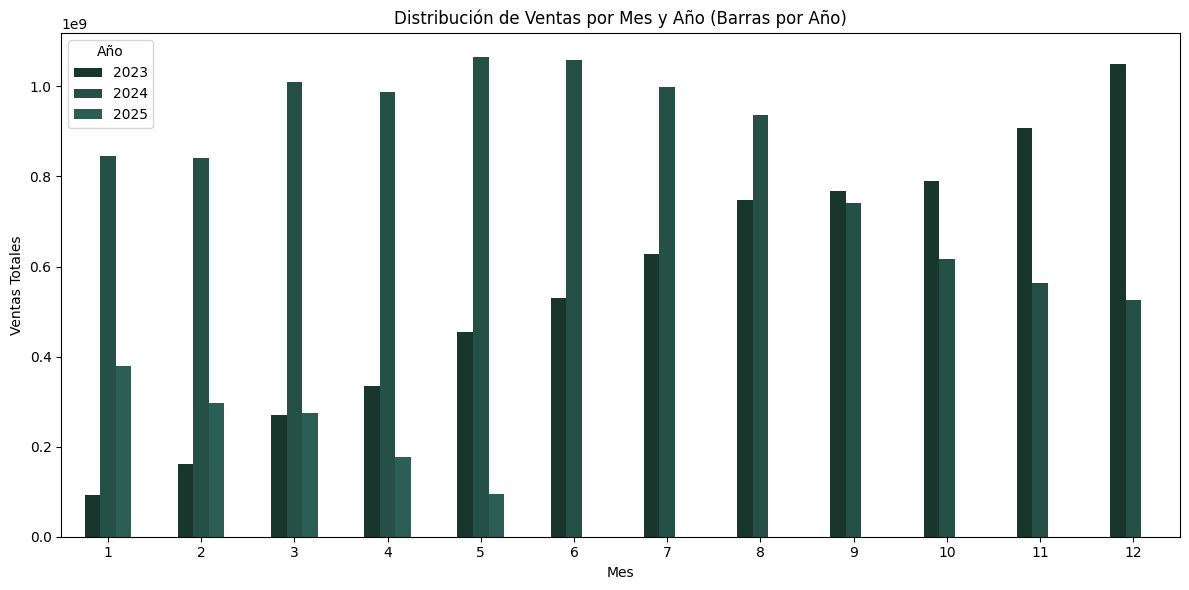

In [34]:
import matplotlib.pyplot as plt

df_grouped = data.groupby(['MONTH', 'YEAR'])['AMOUNT'].sum().unstack()

# Definimos la paleta de colores
green_palette = ["#19362d", "#255045", "#2b5f53", "#306e61", "#347a6c", "#478c80", "#649e94", "#8db9b2", "#b7d4d0"]

fig, ax = plt.subplots(figsize=(12, 6))
df_grouped.plot(kind='bar', ax=ax, color=green_palette[:df_grouped.shape[1]])

ax.set_title("Distribución de Ventas por Mes y Año (Barras por Año)")
ax.set_xlabel("Mes")
ax.set_ylabel("Ventas Totales")
ax.legend(title="Año")

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


1.3.Como se distribuyen las ventas realizadas en cada marca

In [35]:
import pandas as pd
import plotly.express as px

# Definimos la paleta de colores
green_palette = ["#19362d", "#255045", "#2b5f53", "#306e61", "#347a6c", "#478c80", "#649e94", "#8db9b2", "#b7d4d0"]

# Agrupamos las ventas totales por marca (SUBBRAND) y calcular la suma de ventas para cada una, luego ordenar de mayor a menor
brand_sales = data.groupby('SUBBRAND')['AMOUNT'].sum().reset_index().sort_values(by='AMOUNT', ascending=False)

# Creamos una gráfica de barras de distribución de ventas por marca, asignando un color distinto a cada marca
fig_brand_sales = px.bar(
    brand_sales,
    x='SUBBRAND',
    y='AMOUNT',
    color='SUBBRAND',  # Cada marca tendrá un color diferente
    title='Distribución de Ventas Totales por Marca (Ordenado de Mayor a Menor)',
    labels={'AMOUNT': 'Ventas Totales', 'SUBBRAND': 'Marca'},
    color_discrete_sequence=green_palette  # Aplicar la paleta de colores personalizada
)

# Mostramos la gráfica
fig_brand_sales.show()

2. Cual es la tendencia y estacionalidad de:

* Todas las ventas del país con menos ventas

* La marca con más ventas

In [36]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Filtramos datos para España
pais = 'Spain'
df_pais = df[df['COUNTRY'] == pais]

# Creamos una columna de fecha combinando el año y el mes
df_pais['DATE'] = pd.to_datetime(df_pais['YEAR'].astype(str) + '-' + df_pais['MONTH'].astype(str) + '-01')

# Ordenamos por fecha y establecerla como índice
df_pais = df_pais.sort_values(by='DATE')
df_pais.set_index('DATE', inplace=True)

# Resumimos las ventas mensuales
ventas_mensuales = df_pais['AMOUNT'].resample('ME').sum()

# Descomponemos la serie temporal
spain_decomposition = seasonal_decompose(ventas_mensuales, model='additive', period=12)

# Definimos paleta de colores
green_palette = ["#19362d", "#255045", "#2b5f53", "#306e61", "#347a6c", "#478c80", "#649e94", "#8db9b2", "#b7d4d0"]

# Creamos gráfico para España
fig_spain = make_subplots(rows=4, cols=1, vertical_spacing=0.1, subplot_titles=("Ventas Observadas", "Tendencia", "Estacionalidad", "Residuos"))

# Gráficos de cada componente
fig_spain.add_trace(go.Scatter(x=spain_decomposition.observed.index, y=spain_decomposition.observed, mode='lines', name='Ventas Observadas', line=dict(color=green_palette[0])), row=1, col=1)
fig_spain.add_trace(go.Scatter(x=spain_decomposition.trend.index, y=spain_decomposition.trend, mode='lines', name='Tendencia', line=dict(color=green_palette[2])), row=2, col=1)
fig_spain.add_trace(go.Scatter(x=spain_decomposition.seasonal.index, y=spain_decomposition.seasonal, mode='lines', name='Estacionalidad', line=dict(color=green_palette[4])), row=3, col=1)
fig_spain.add_trace(go.Scatter(x=spain_decomposition.resid.index, y=spain_decomposition.resid, mode='lines', name='Residuos', line=dict(color=green_palette[6])), row=4, col=1)

fig_spain.update_layout(title=f"Tendencia y Estacionalidad de Ventas en {pais}", height=800, showlegend=False)

# Mostramos el gráfico para España
fig_spain.show()


<ipython-input-36-12da418ad1e8>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Filtra datos para "Pepsi Max (L3)"
marca = 'Pepsi Max (L3)'
df_marca = df[df['SUBBRAND'] == marca]

# Creamos una columna de fecha combinando el año y el mes
df_marca['DATE'] = pd.to_datetime(df_marca['YEAR'].astype(str) + '-' + df_marca['MONTH'].astype(str) + '-01')

# Ordenamos por fecha y establecerla como índice
df_marca = df_marca.sort_values(by='DATE')
df_marca.set_index('DATE', inplace=True)

# Resumimos las ventas mensuales
ventas_mensuales_marca = df_marca['AMOUNT'].resample('M').sum()

# Descomponemos la serie temporal
pepsi_max_decomposition = seasonal_decompose(ventas_mensuales_marca, model='additive', period=12)

# Definimos la paleta de colores
green_palette = ["#19362d", "#255045", "#2b5f53", "#306e61", "#347a6c", "#478c80", "#649e94", "#8db9b2", "#b7d4d0"]

# Creamos gráfico para Pepsi Max
fig_pepsi = make_subplots(rows=4, cols=1, vertical_spacing=0.1, subplot_titles=("Ventas Observadas", "Tendencia", "Estacionalidad", "Residuos"))

# Gráficos de cada componente
fig_pepsi.add_trace(go.Scatter(x=pepsi_max_decomposition.observed.index, y=pepsi_max_decomposition.observed, mode='lines', name='Ventas Observadas', line=dict(color=green_palette[1])), row=1, col=1)
fig_pepsi.add_trace(go.Scatter(x=pepsi_max_decomposition.trend.index, y=pepsi_max_decomposition.trend, mode='lines', name='Tendencia', line=dict(color=green_palette[3])), row=2, col=1)
fig_pepsi.add_trace(go.Scatter(x=pepsi_max_decomposition.seasonal.index, y=pepsi_max_decomposition.seasonal, mode='lines', name='Estacionalidad', line=dict(color=green_palette[5])), row=3, col=1)
fig_pepsi.add_trace(go.Scatter(x=pepsi_max_decomposition.resid.index, y=pepsi_max_decomposition.resid, mode='lines', name='Residuos', line=dict(color=green_palette[7])), row=4, col=1)

# Configuramos el diseño del gráfico
fig_pepsi.update_layout(
    title="Tendencia y Estacionalidad de Ventas de Pepsi Max (L3)",
    height=800,
    showlegend=False
)

# Configuración de etiquetas en el eje x y eje y
fig_pepsi.update_yaxes(title_text="Ventas Observadas", row=1, col=1)
fig_pepsi.update_yaxes(title_text="Tendencia", row=2, col=1)
fig_pepsi.update_yaxes(title_text="Estacionalidad", row=3, col=1)
fig_pepsi.update_yaxes(title_text="Residuos", row=4, col=1)
fig_pepsi.update_xaxes(title_text="Fecha", row=4, col=1)

# Mostramos el gráfico interactivo
fig_pepsi.show()


<ipython-input-37-c51697297ce3>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-37-c51697297ce3>:17: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



3. Cuales son las predicciones hechas en España y como de buenas son.

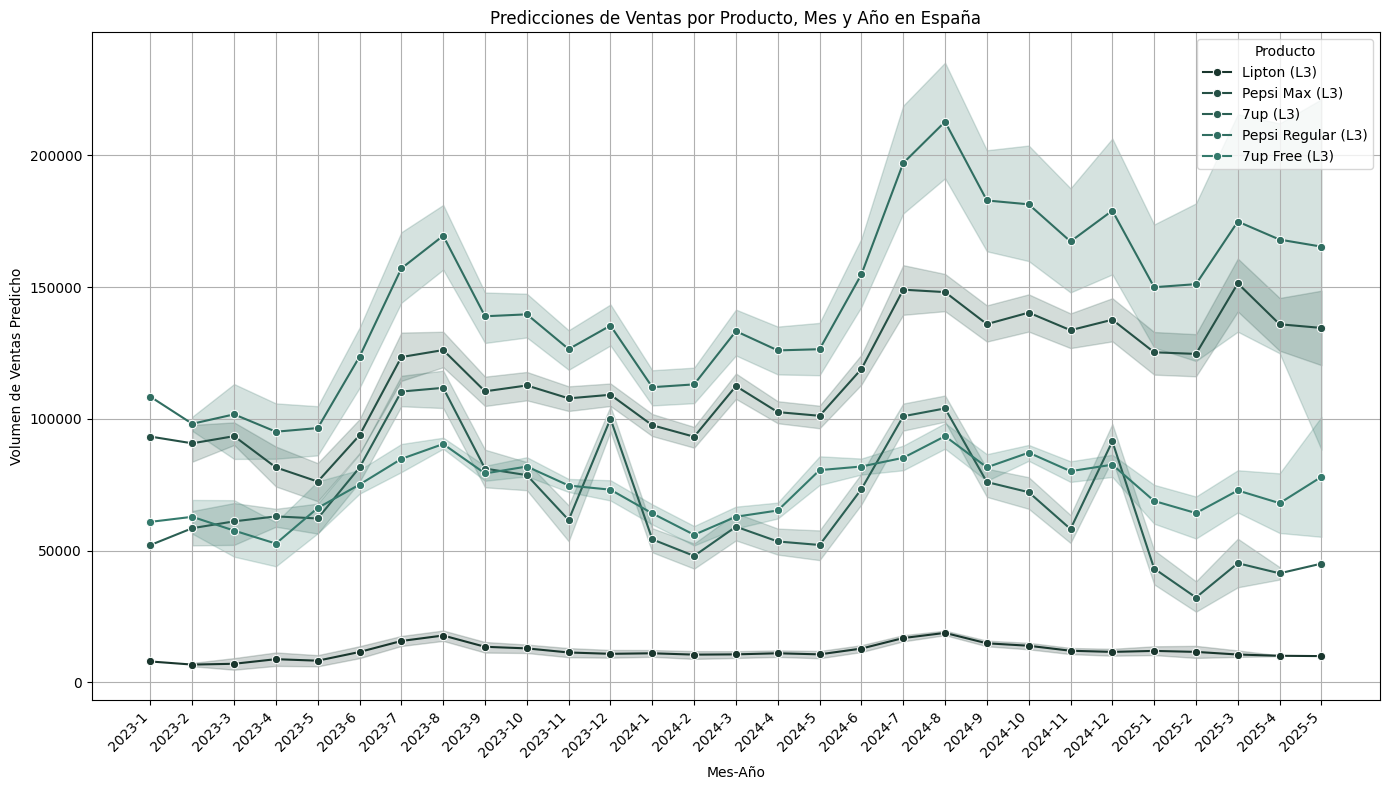

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definimos la paleta de colores
green_palette = ["#19362d", "#255045", "#2b5f53", "#306e61", "#347a6c"]

# Filtramos los datos para las predicciones realizadas en España
spain_forecasts_unique = data[(data['COUNTRY'] == 'Spain') & (data['SCENARIO'] == 'AI_forecast')].copy()

# Creamos una columna combinada "MONTH-YEAR"
spain_forecasts_unique['MONTH_YEAR'] = spain_forecasts_unique['YEAR'].astype(str) + '-' + spain_forecasts_unique['MONTH'].astype(str)

# Ordenamos por AÑO y MES para asegurar el orden correcto en el gráfico
spain_forecasts_unique = spain_forecasts_unique.sort_values(by=['YEAR', 'MONTH'])

# Graficamos con MONTH-YEAR en el eje x
plt.figure(figsize=(14, 8))
sns.lineplot(data=spain_forecasts_unique, x='MONTH_YEAR', y='AMOUNT', hue='SUBBRAND', marker='o', palette=green_palette)

# Personalizamos el gráfico
plt.title("Predicciones de Ventas por Producto, Mes y Año en España")
plt.xlabel("Mes-Año")
plt.ylabel("Volumen de Ventas Predicho")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.legend(title="Producto")
plt.tight_layout()
plt.show()
